In [3]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# B. Apply LDA Algorithm on Iris Dataset and classify which species a given flower 
belongs to. 
Dataset Link:https://www.kaggle.com/datasets/uciml/iris 

In [4]:
# load iris dataset
iris=datasets.load_iris()

In [5]:
# Create a DataFrame using the data and feature names
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [6]:
# Add the target column
df['target'] = iris['target']

In [7]:
# Map the target numbers to species names
df['species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# Preprocessing
# Separate features and target
X = df.drop(["species", "target"], axis=1)  # Drop both 'species' and 'target' columns from X
y = df["species"]

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# Make predictions on the test set
y_pred = lda.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 100.0%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



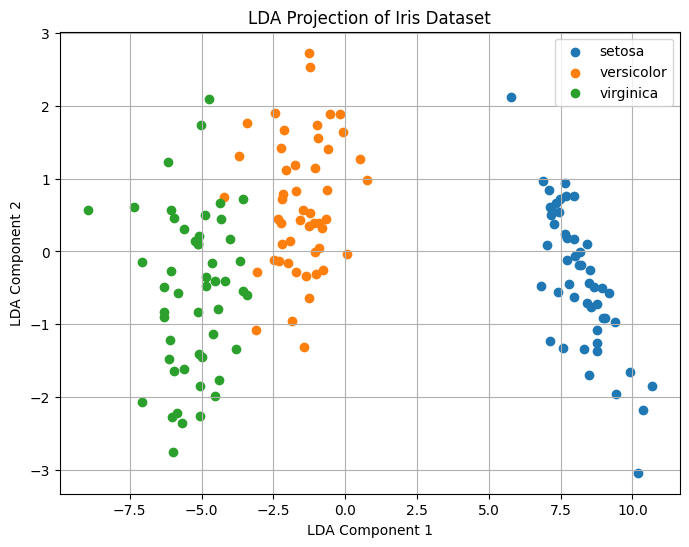

In [14]:
# Visualizing LDA components (optional)
X_lda = lda.transform(X)
plt.figure(figsize=(8, 6))
for species in y.unique():
    plt.scatter(X_lda[y == species, 0], X_lda[y == species, 1], label=species)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Iris Dataset")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Define a new observation
new = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)

# Make the prediction for the new observation
prediction = lda.predict(new)
print(f"Predicted class for the new observation: {prediction[0]}")


Predicted class for the new observation: setosa
